# Credit Risk Scoring for Subprime Mortgages

This project is about credit risk scoring for subprime mortgage we use machine learning to predict default likelihood. We articulate the project with typical data science steps: data preprocessing, exploratory analysis, and the deployment of a logistic regression model, with at the end an emphasis on ROC curve analysis. The goal is to fine-tune a predictive model for assessing credit risk and collect insights that can inform risk management practices within the financial sector.

# Data collection & preparation

In [3]:
#importing relevant librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_excel('data/data_CreditScoring.xlsx', engine='openpyxl')

In [6]:
data.shape

(3000, 30)

In [7]:
data.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [8]:
#dropping customer ID column
data = data.drop('ID', axis = 1)
data.shape

(3000, 29)

In [9]:
#checking missing values
data.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [10]:
#filling missing values with mean from opther existing values
data = data.fillna(data.mean())

In [11]:
#Checking again
data.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

# Exploratory Data Analysis

In [12]:
#Counting well rated loans (value = 0) and junk ones (value = 1)
data['TARGET'].value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

In [13]:
#Summary
data.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


# Preparing data for modelling

In [14]:
#Splitting the dataset into the dependent variable (y) and independent variables (X)
y = data.iloc[:, 0].values  #Extracting the target variable (column 0) as an array
X = data.iloc[:, 1:29].values  #Extracting the features (columns 1 to 28) as an array

In [15]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  #20% of the data is allocated to the test set
                                                    random_state=0,  #Ensures reproducibility of results
                                                    stratify=y)  #Ensures the distribution of the target variable is similar in both the training and test sets

In [16]:
#Scaling the features
sc = StandardScaler()  #Initializing the standard scaler
X_train = sc.fit_transform(X_train)  #Fitting the scaler to the training data and transforming it
X_test = sc.transform(X_test)  #Transforming the test data based on the scaler fitted to the training data

# Modelling

In [17]:
#Initialize the Logistic Regression classifier
classifier =  LogisticRegression()

#Fit the model to the training data
#This step involves the model learning from the input features (X_train) and the target variable (y_train)
classifier.fit(X_train, y_train)

#Predict the target variable for the test data
#Using the trained model to predict the outcomes for the unseen test data (X_test)
y_pred = classifier.predict(X_test)

# Model Evaluation

In [18]:
#Display the confusion matrix
#This matrix shows the counts of true positive, true negative, false positive, and false negative predictions
#It is used to evaluate the accuracy of the classification model on the test data
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [19]:
#Print the accuracy score of the model
#The accuracy score represents the proportion of correct predictions among the total number of cases evaluated
#It is a straightforward metric to assess the overall performance of the classification model on the test data
print(accuracy_score(y_test, y_pred))

0.8333333333333334


In [20]:
#Generate probability predictions for each class
#This method provides the probabilities that the model assigns to each class for each sample in the test set
#It is useful for evaluating the confidence of the model's predictions and for making decisions based on probability thresholds
predictions = classifier.predict_proba(X_test)
predictions

array([[0.61644691, 0.38355309],
       [0.9885656 , 0.0114344 ],
       [0.87069686, 0.12930314],
       ...,
       [0.94450568, 0.05549432],
       [0.46756903, 0.53243097],
       [0.94014209, 0.05985791]])

# ROC & AUC

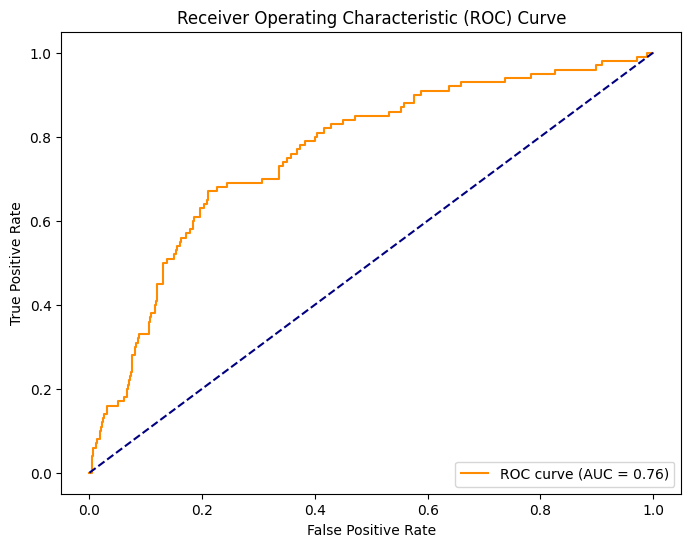

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

We used logistic regression model to predict the probability of default. The project entailed data preparation, including handling missing values and standardizing features, followed by exploratory data analysis to understand the characteristics and distribution of the dataset. The model's performance was evaluated using a confusion matrix and accuracy score, revealing a satisfactory level of predictive power with an accuracy of approximately 83.33%.

We used Receiver Operating Characteristic curve and Area Under the Curve score at 0.76. This indicates a strong ability of the model to distinguish between default and non-default cases, albeit with room for further enhancement. The ROC curve analysis highlights the model's efficiency in balancing the true positive rate against the false positive rate, providing insights into its practical applicability in assessing credit risk for subprime mortgages.

The logistic regression model offers a reliable tool for financial institutions to make informed decisions regarding mortgage approvals. Future directions could explore more sophisticated models and feature engineering techniques to further refine predictive accuracy and operationalize these insights in real-world credit risk management scenarios.

# Precision-recall curve

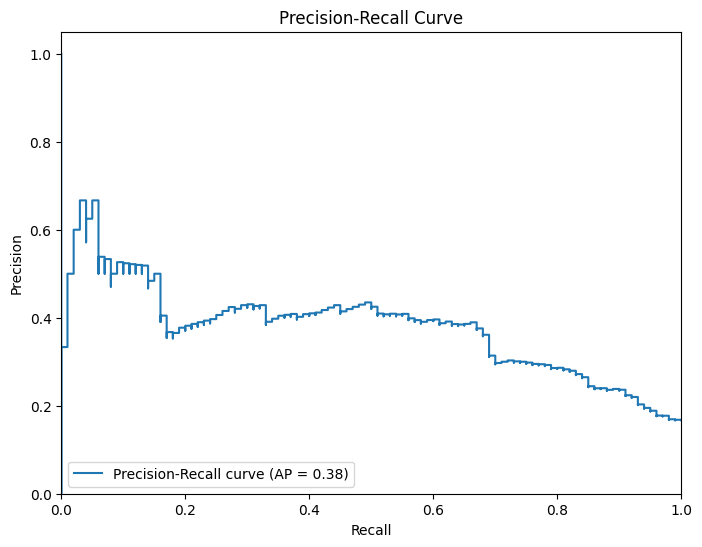

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

#Calculate curve
precision, recall, _ = precision_recall_curve(y_test, predictions[:, 1])
average_precision = average_precision_score(y_test, predictions[:, 1])

#Plot
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

The precision-recall curve elucidates the balance between precision (the true positive rate) and recall (the positive predictive value) across varying thresholds. With an average precision (AP) score of 0.38, the model exhibits a moderate capacity for accurately identifying positive cases when predicting positive outcomes. The model reaches its optimal balance between precision and recall, with the highest F1 score of 0.49 achieved at a precision of approximately 0.39 and a recall of 0.67. This optimal point suggests that while the model may not capture all positive instances (a recall of 0.67), it maintains a reasonable level of accuracy in its positive predictions (a precision of 0.39). This balance is crucial in contexts where both false positives and false negatives carry significant consequences, such as in credit risk evaluation, where it is essential to minimize the risk of default without overlooking too many potential opportunities for lending.

In [29]:
#Calculate F1 scores from precision and recall values
F1_scores = 2 * (precision * recall) / (precision + recall)

#Find the index of the highest F1 score
highest_F1_idx = np.nanargmax(F1_scores)  # Using nanargmax to ignore any NaN values in the F1 scores

# Find the highest F1 score
highest_F1 = F1_scores[highest_F1_idx]

# Find the corresponding precision and recall
best_precision = precision[highest_F1_idx]
best_recall = recall[highest_F1_idx]
print(f"Highest F1 score is {highest_F1} at precision {best_precision} and recall {best_recall}")

Highest F1 score is 0.4926470588235294 at precision 0.38953488372093026 and recall 0.67


/var/folders/6d/b1gsjpqs217gk90h_x_fnkj80000gn/T/ipykernel_7174/2167999976.py:2: RuntimeWarning: invalid value encountered in divide
  F1_scores = 2 * (precision * recall) / (precision + recall)
